# Notebook II project
**IMTA S5 TAF Health**

Graphs from experiments

>Result: LSGAN with RMSProp is the best configuration

Author : AriasC. 2020. CiGAN2

# Experiments

### Linear change of learning rates (1e-5 to 1e-4) using RMSPropOptimizer

First it is evaluated with mammo and dcgan. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

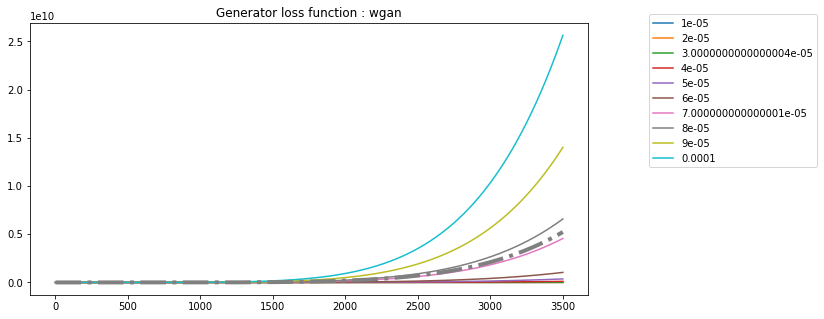

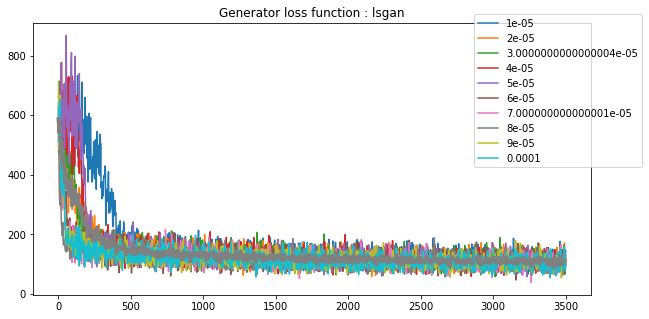

In [9]:
toplot(wgan,learning,"Generator loss function : wgan",1)
toplot(lsgan,learning,"Generator loss function : lsgan",1)

In [94]:
%matplotlib inline

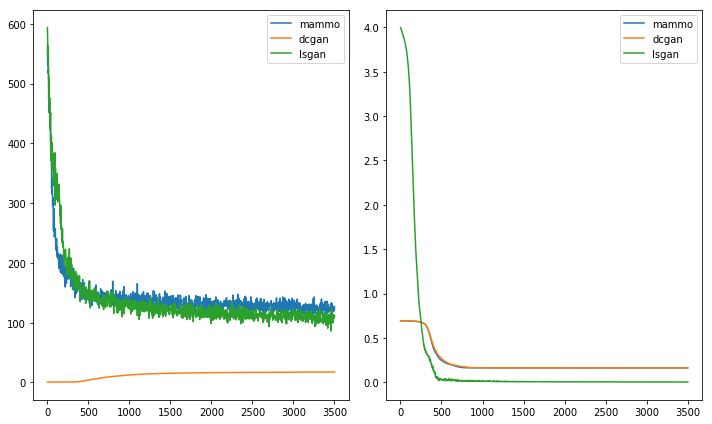

In [45]:
sel = 1
fig,(ax,ax2) = plt.subplots(1,2,figsize = (10,6))
for data in [mammo,dcgan,lsgan]:
    ax.plot(data[0,sel,:,0],np.mean(data[:,sel,:,1],axis=0))

ax.legend(["mammo","dcgan","lsgan"])
sel = 0
for data in [mammo,dcgan,lsgan]:
    ax2.plot(data[0,sel,:,0],np.mean(data[:,sel,:,1],axis=0))
    
ax2.legend(["mammo","dcgan","lsgan"])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [37]:
%matplotlib inline

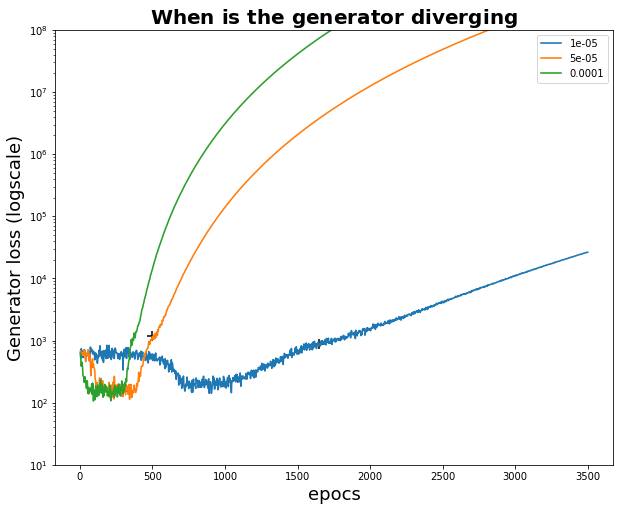

In [55]:
### id = [0,4,7]
lr = [1e-5,5e-5,1e-4]
index = [1650,500,300]

plt.figure(figsize = (10,8))
data = wgan
sel = 1
##generator
slope = get_slope(data[0,sel,:,0])

for c,i in enumerate(id):
    #epoc to index in vector
    lim = int(index[c]//slope)
    plt.plot(data[i,sel,:,0],data[i,sel,:,1],linewidth=1.6, label = lr[c]) 
    #plt.plot(data[i,sel,lim:,0],data[i,sel,lim:,1],linewidth=2,alpha = 0.8)
    plt.scatter(index[c],data[i,sel,lim,1],s=95, color = "black",marker = "+")

if sel:
    plt.yscale("log")
    plt.ylim([1e1,10e7])
plt.title('$\\bf{When\ is\ the\ generator\ diverging}$',
         fontsize=20)
plt.xlabel("epocs",fontsize=18)
plt.ylabel("Generator loss (logscale)",fontsize=18)
plt.legend()
plt.show()

#add annotation and image for each point de divergence ?

###  plot result to select the best lr

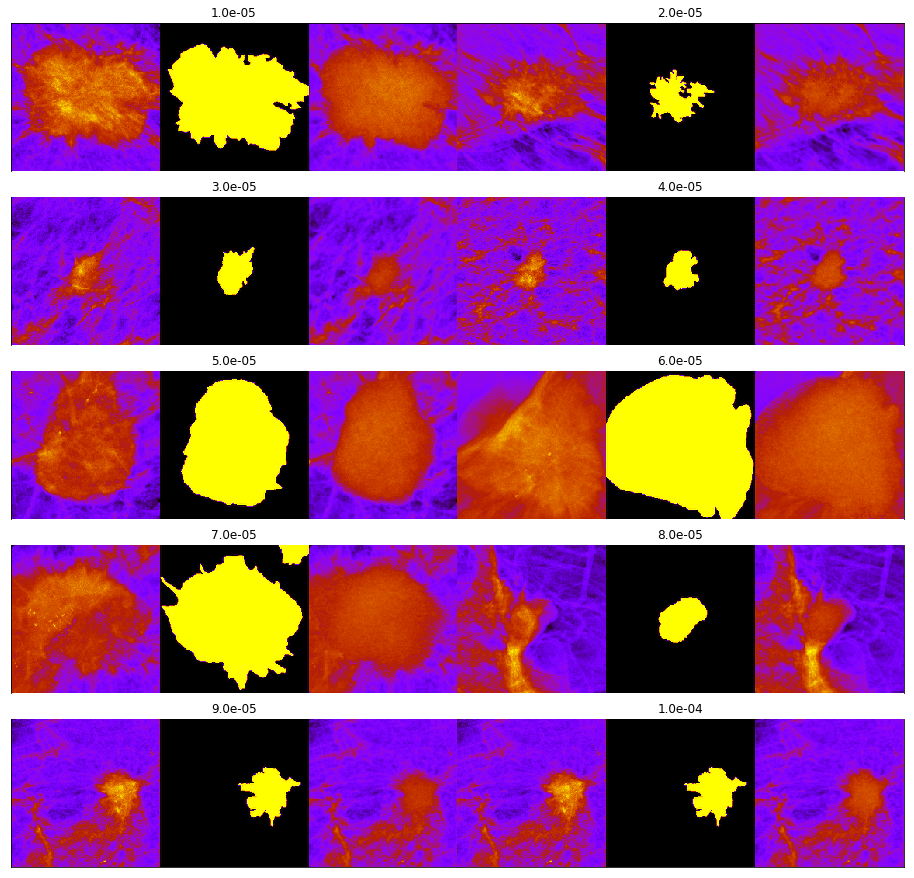

In [25]:
from itertools import product
import matplotlib.gridspec as gridspec

from itertools import product
learning =  np.linspace(1e-5,1e-4,10)

fig = plt.figure(figsize=(16, 16))
path =  "./validation/lsgan"
# gridspec inside gridspec
outer_grid = gridspec.GridSpec(5, 2, wspace=0.0, hspace=0.0)

for i in range(10):
    a = i // 6 + 1
    b = i % 2 + 1
    ax = fig.add_subplot(outer_grid[i])
    img = plt.imread("{}{:.1e}/lsgan{:.1e}_256_3450.png".format(path,learning[i],learning[i]))
    ax.imshow(img,cmap = plt.cm.gnuplot)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("{:.1e}".format(learning[i]))
    fig.add_subplot(ax)

all_axes = fig.get_axes()

# show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()

##add smoothing in d


_____
_____
# Find the best configuration

## 2. Change normalization in vgg

In [3]:
def compare_loss(data, title,list_exp,log = 0):
    lr = [1e-5,5e-5,1e-4]
    losses = data.shape[0]
    learnings = data.shape[1]

    fig = plt.figure(figsize=(15, 8))
    outer_grid = gridspec.GridSpec(2, losses, wspace=0.1, hspace=0.25)

    for i in range(losses*2):
        ax = fig.add_subplot(outer_grid[i])
        j = i % losses
        k = i // losses    
        for l in range(learnings):
            ax.plot(data[j,l,k,:,0],data[j,l,k,:,1],label = lr[l])
        if log:
            ax.set_xscale('log')
        ax.set_title("{}".format(list_exp[j]))
        plt.legend()
    plt.suptitle(title, fontsize = 20)
    plt.show()

In [6]:
exp = ["lsgan","mammo","dcgan"]

data = []
for i in exp:
    path = "../results/{}/{}.npz".format(i,"rms")
    data.append(np.load(path)['loss'])
rms = np.stack(data)

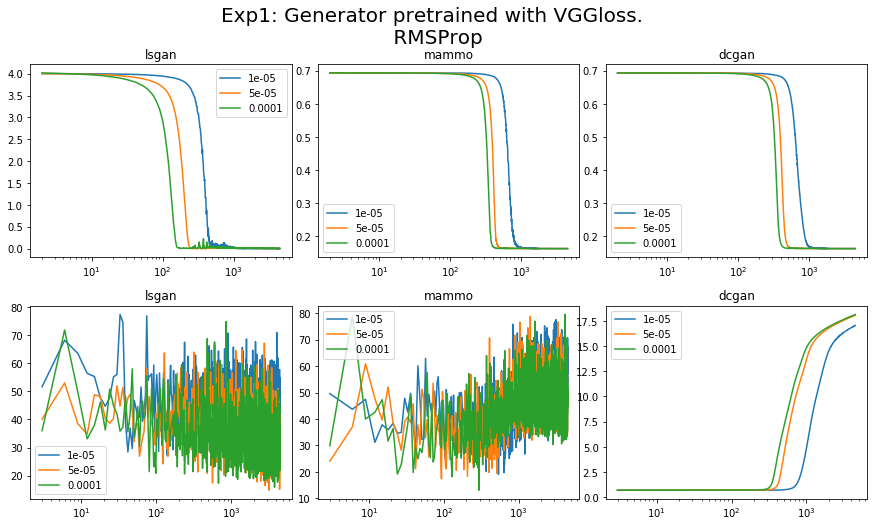

In [7]:


compare_loss(rms,"Exp1: Generator pretrained with VGGloss. \n RMSProp",exp,1)

In [9]:
data = []
for i in exp:
    path = "../results/{}/{}.npz".format(i,"adam")
    data.append(np.load(path)['loss'])
adam  = np.stack(data)

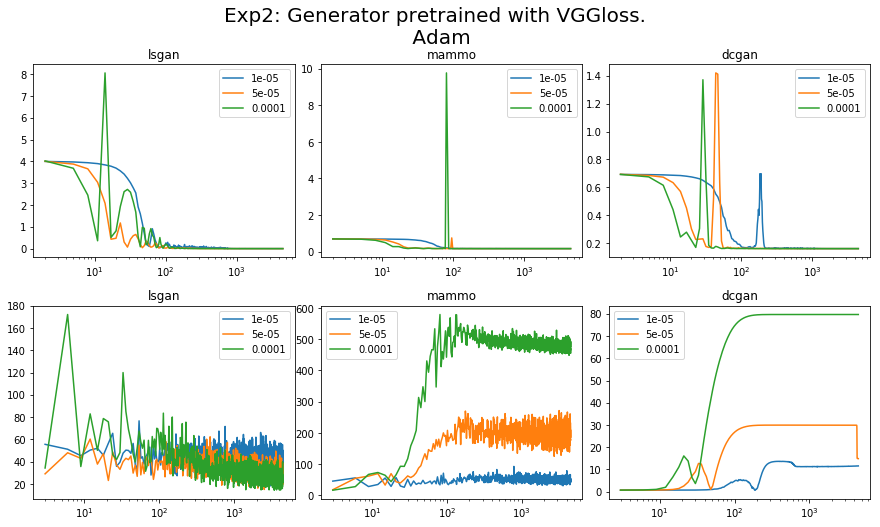

In [10]:
compare_loss(adam,"Exp2: Generator pretrained with VGGloss. \n Adam",exp,1)

Model training first with vgg generator,

second experiment:
    Same tests but no vgg training

# EXP2. Without pretraining VGG

In [12]:
exp = ["lsgan","mammo","dcgan"]

data = []
for i in exp:
    path = "../results/{}/{}0.npz".format(i,"rms")
    data.append(np.load(path)['loss'])
rms_0 = np.stack(data)

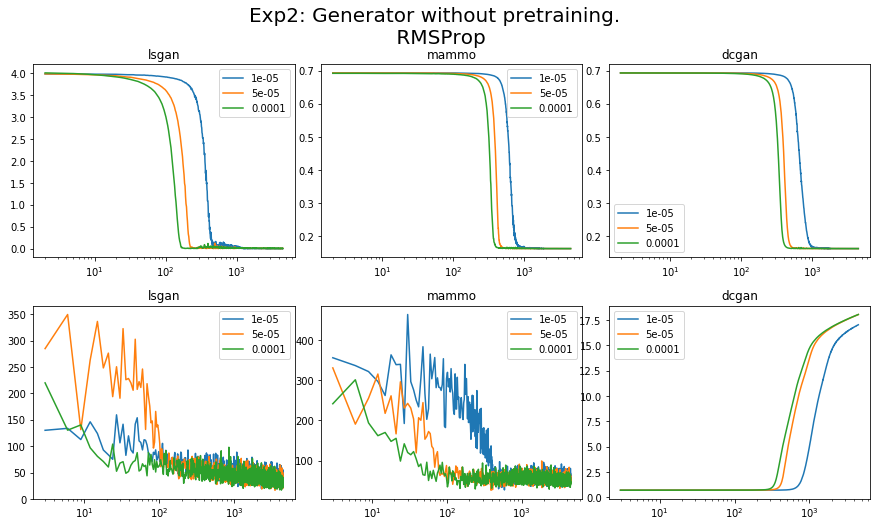

In [13]:
compare_loss(rms_0,"Exp2: Generator without pretraining. \n RMSProp",exp,1)

In [14]:
data = []
for i in exp:
    path = "../results/{}/{}0.npz".format(i,"adam")
    data.append(np.load(path)['loss'])
adam_0 = np.stack(data)

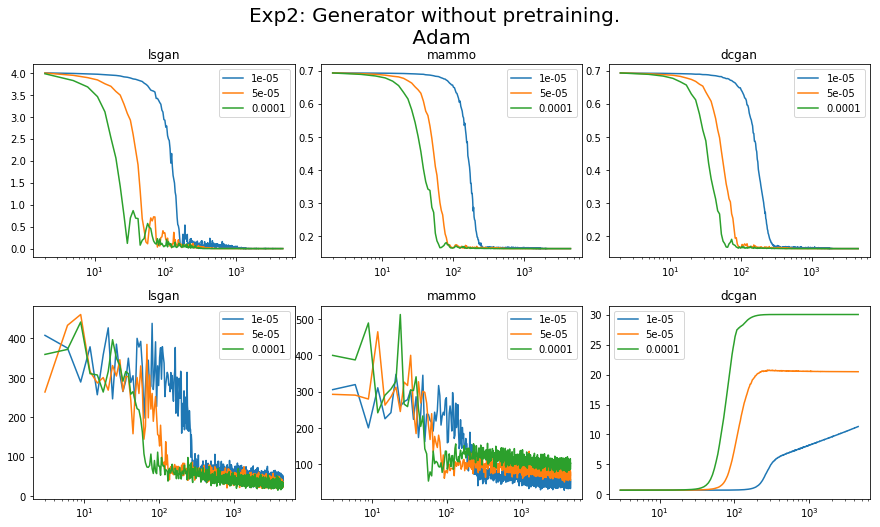

In [15]:
compare_loss(adam_0,"Exp2: Generator without pretraining. \n Adam",exp,1)

Observation: 
    - DCGAN is unstable, it diverges after a few epochs
    - MAMMO diverge with Adam in 1e-4
    - LSGAN never diverges, good behavior

# Comparation visual
## Methode to compute the mean error between the fake image and the real œm

In [19]:

def get_diference(epocs,path):
    difference = []
    for i in epocs:
        im = plt.imread("{}_256_{}.png".format(path,i))
        origin = im[:,:192].mean()
        fake = im[:,192*2:].mean()
        difference.append(abs(fake-origin))
    return difference

In [22]:
## create dataset of results

In [11]:
opt =  ["rms","adam"]
vgg =  [0,1]
learning =  [1e-5,5e-5,1e-4]
losses = ["lsgan","mammo","dcgan"]
epocs = np.arange(300,4800,300)

summary = []
for ls in losses:
    for o in opt:
        for lr in learning:
            path = "validation/{}_{}_{:.1e}/{}_{}_{:.1e}".format(ls,o,lr,ls,o,lr)
            dif = get_diference(epocs,path) #mean(fake)-mean(origin) par epocs
            #create experiment
            data = [ls,o,lr,1]
            _ = [data.append(x) for x in dif]
            summary.append(data)
            print(path)

#load exp without vgg
for ls in losses:
    for o in opt:
        for lr in learning:
            path = "validation/{}_{}_0_{:.1e}/{}_{}_0_{:.1e}".format(ls,o,lr,ls,o,lr)
            dif = get_diference(epocs,path) #mean(fake)-mean(origin) par epocs
            data = [ls,o,lr,0]
            _ = [data.append(x) for x in dif]
            summary.append(data)
            print(path)

validation/lsgan_rms_1.0e-05/lsgan_rms_1.0e-05
validation/lsgan_rms_5.0e-05/lsgan_rms_5.0e-05
validation/lsgan_rms_1.0e-04/lsgan_rms_1.0e-04
validation/lsgan_adam_1.0e-05/lsgan_adam_1.0e-05
validation/lsgan_adam_5.0e-05/lsgan_adam_5.0e-05
validation/lsgan_adam_1.0e-04/lsgan_adam_1.0e-04
validation/mammo_rms_1.0e-05/mammo_rms_1.0e-05
validation/mammo_rms_5.0e-05/mammo_rms_5.0e-05
validation/mammo_rms_1.0e-04/mammo_rms_1.0e-04
validation/mammo_adam_1.0e-05/mammo_adam_1.0e-05
validation/mammo_adam_5.0e-05/mammo_adam_5.0e-05
validation/mammo_adam_1.0e-04/mammo_adam_1.0e-04
validation/dcgan_rms_1.0e-05/dcgan_rms_1.0e-05
validation/dcgan_rms_5.0e-05/dcgan_rms_5.0e-05
validation/dcgan_rms_1.0e-04/dcgan_rms_1.0e-04
validation/dcgan_adam_1.0e-05/dcgan_adam_1.0e-05
validation/dcgan_adam_5.0e-05/dcgan_adam_5.0e-05
validation/dcgan_adam_1.0e-04/dcgan_adam_1.0e-04
validation/lsgan_rms_0_1.0e-05/lsgan_rms_0_1.0e-05
validation/lsgan_rms_0_5.0e-05/lsgan_rms_0_5.0e-05
validation/lsgan_rms_0_1.0e-04/lsg

In [24]:
import pandas as pd

In [12]:
#to dataframe
col = ["loss_fuction","optimizer","learning_rate","preTrainVGG"]
_ = [col.append("epoc_" + str(x)) for x in epocs]
results = pd.DataFrame(data = summary, columns=col)
results.head()

,loss_fuction,optimizer,learning_rate,preTrainVGG,epoc_300,epoc_600,epoc_900,epoc_1200,epoc_1500,epoc_1800,epoc_2100,epoc_2400,epoc_2700,epoc_3000,epoc_3300,epoc_3600,epoc_3900,epoc_4200,epoc_4500
0,lsgan,rms,0.00001,1,0.060846,0.011344,0.000914,0.007152,0.002709,0.060353,0.004409,0.038713,0.005438,0.013220,0.011555,0.003513,0.000425,0.018564,0.012858
1,lsgan,rms,0.00005,1,0.077392,0.004138,0.008553,0.001252,0.028667,0.020613,0.018629,0.041921,0.014560,0.007009,0.007094,0.012618,0.009541,0.021201,0.007756
2,lsgan,rms,0.00010,1,0.001223,0.023279,0.012741,0.026129,0.018072,0.024529,0.003027,0.018681,0.013092,0.017819,0.009338,0.052388,0.012249,0.013886,0.017165
3,lsgan,adam,0.00001,1,0.006099,0.011218,0.007754,0.041590,0.015566,0.007326,0.000896,0.046459,0.029031,0.014177,0.031816,0.003228,0.003948,0.036213,0.035321
4,lsgan,adam,0.00005,1,0.044692,0.000226,0.006400,0.001257,0.002766,0.030792,0.039285,0.004031,0.010637,0.001325,0.004366,0.005431,0.003703,0.000344,0.003176


In [13]:
results.to_csv("../results/results_exp_fin.csv",index = False, header=True)



Change in VGG (*****) just inside
=======


exp3: disc it 5,10 without vgg
    lsgan_rms 5e-5,mammo rms 5e-5
    6000 epocs

self.l1_factor = [1200]

def vgg_loss_inside(self):
        #Features extraction and build loss function VGG model       
        #----------- Build VGG networks -----------------     
        vgg_real = build_vgg19(tf.multiply(self.input_real, self.input_mask))
        vgg_fake = build_vgg19(tf.multiply(self.fake_image, self.input_mask), reuse=True)
        
        #First layer
        G_loss_vgg = tf.reduce_mean(tf.abs(vgg_real['input'] - vgg_fake['input']))
        
        for i in range(1, 4):
            conv_str = 'pool' + str(i)
            #get pool
            G_loss_vgg += (self.l1_factor)*tf.reduce_mean(tf.abs(vgg_real[conv_str] - vgg_fake[conv_str]))
        return G_loss_vgg

indisss